# Fuel Efficiency Prediction and Analysis for Automotive Insights

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('Downloads/OneDrive_1_27-04-2024/autos_mpg.csv')

In [4]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


#### Shape of the dataset

In [5]:
df.shape

(398, 9)

## Dataset information
- mpg: Car's fuel efficiency measured in miles per gallon.
- cylinders: Number of cylinders in the car's engine.
- displacement: Engine displacement in cubic inches.
- horsepower: Engine power output measured in horsepower.
- weight: Car's weight in pounds.
- acceleration: Time taken for the car to reach a certain speed from standstill.
- model_year: Year of manufacturing or model release.
- origin: Country of origin or manufacture of the car.
- car_name: Unique identifier for each car instance.


### Check Missing values

In [6]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

#### There are no missing values in the data set

###  Check Duplicates

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [10]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [12]:
df['horsepower'][df['horsepower']== '?'].count()

6

In [13]:
df['horsepower'][df['horsepower']== '?']

32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: horsepower, dtype: object

In [14]:
df['horsepower']=df['horsepower'].replace('?',np.nan)

In [15]:
df['horsepower'] = df['horsepower'].astype(np.float64)

In [16]:
df['horsepower'].dtype

dtype('float64')

In [17]:
df['horsepower']=df['horsepower'].fillna(df['horsepower'].mean())

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


/Users/ashishkumarpradhan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


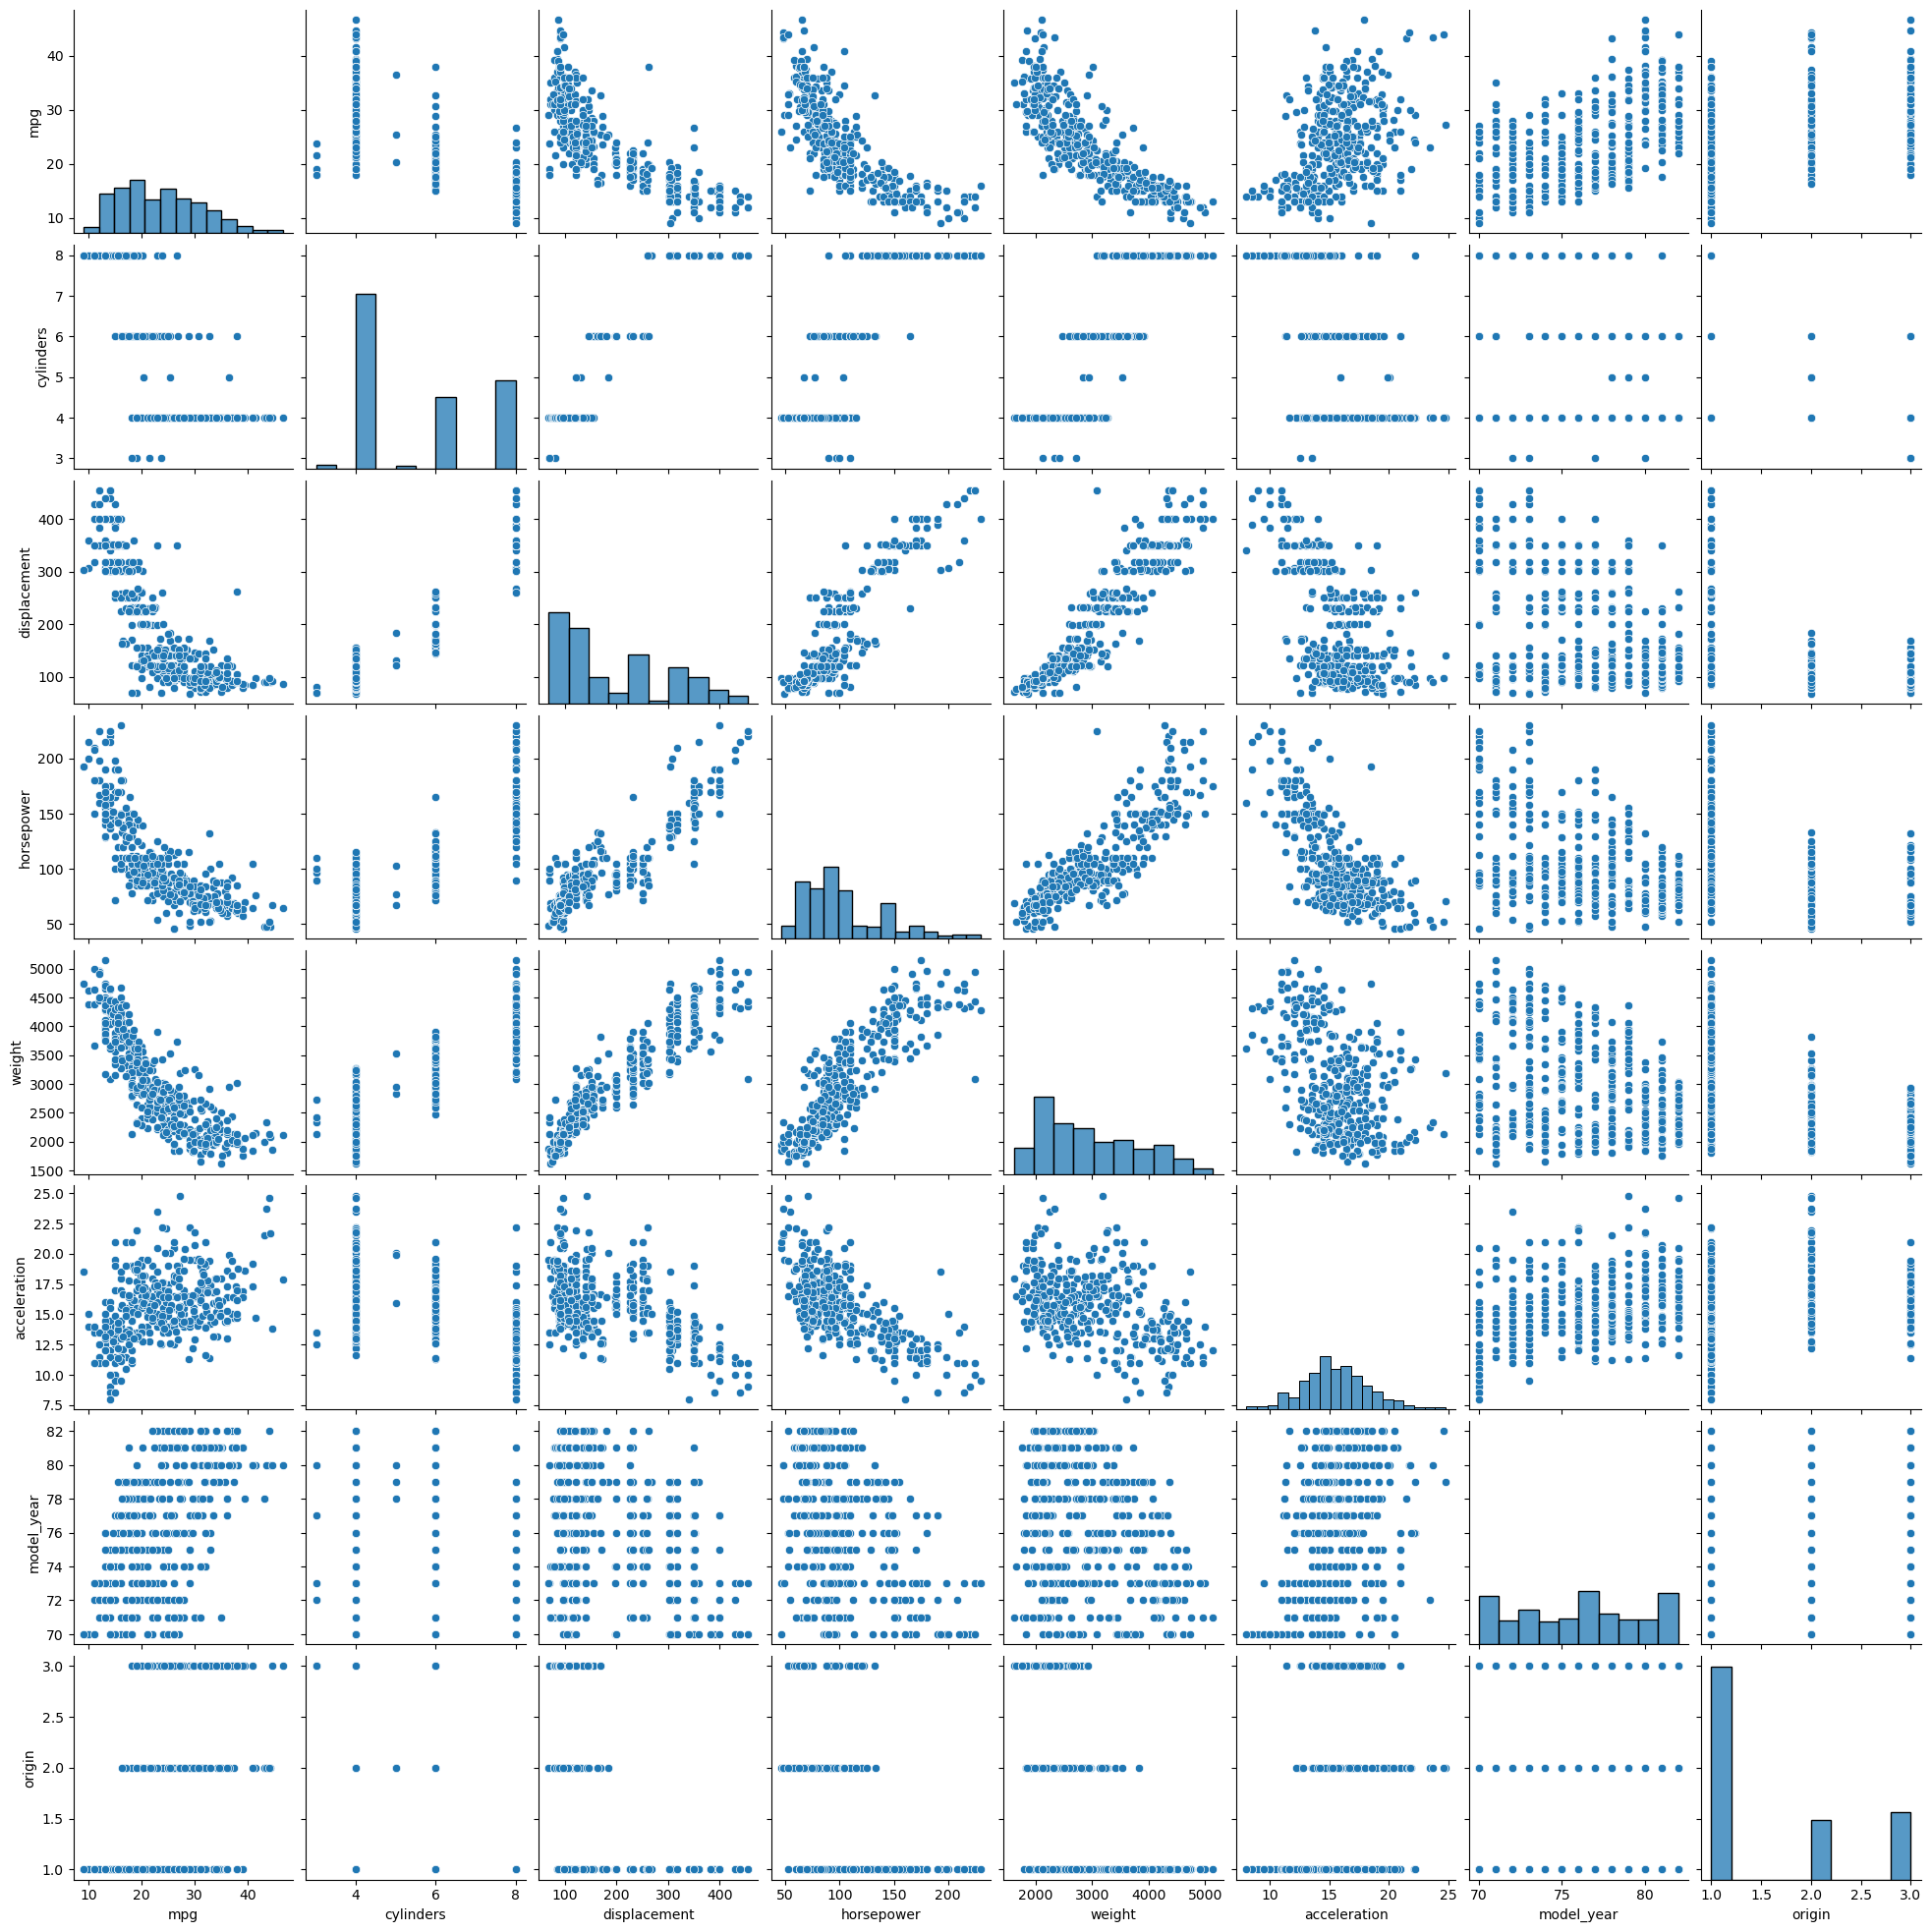

In [19]:
sns.pairplot(df)

In [20]:
cat_feature =['car_name']
num_feature= df.drop(cat_feature , axis=1)
df_corr = num_feature.corr()



<Axes: >

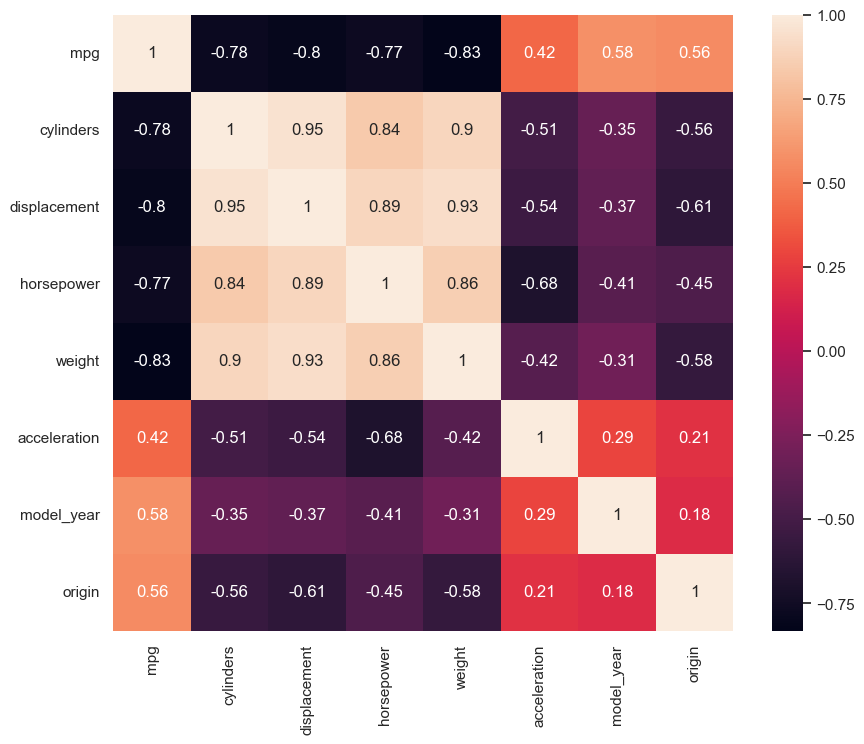

In [21]:
sns.set(rc={'figure.figsize':(10,8)})

sns.heatmap(df_corr,annot=True)

In [22]:
df_corr.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.989098,-0.989339,-0.980388,-0.993002,0.857167,0.890973,0.910021
cylinders,-0.989098,1.000000,0.999147,0.989005,0.996040,-0.896019,-0.849203,-0.929215
displacement,-0.989339,0.999147,1.000000,0.991455,0.997095,-0.899491,-0.848277,-0.931364
horsepower,-0.980388,0.989005,0.991455,1.000000,0.984740,-0.939361,-0.862458,-0.886107
weight,-0.993002,0.996040,0.997095,0.984740,1.000000,-0.874019,-0.840798,-0.937858
acceleration,0.857167,-0.896019,-0.899491,-0.939361,-0.874019,1.000000,0.759096,0.729701
model_year,0.890973,-0.849203,-0.848277,-0.862458,-0.840798,0.759096,1.000000,0.691943
origin,0.910021,-0.929215,-0.931364,-0.886107,-0.937858,0.729701,0.691943,1.000000


<Axes: >

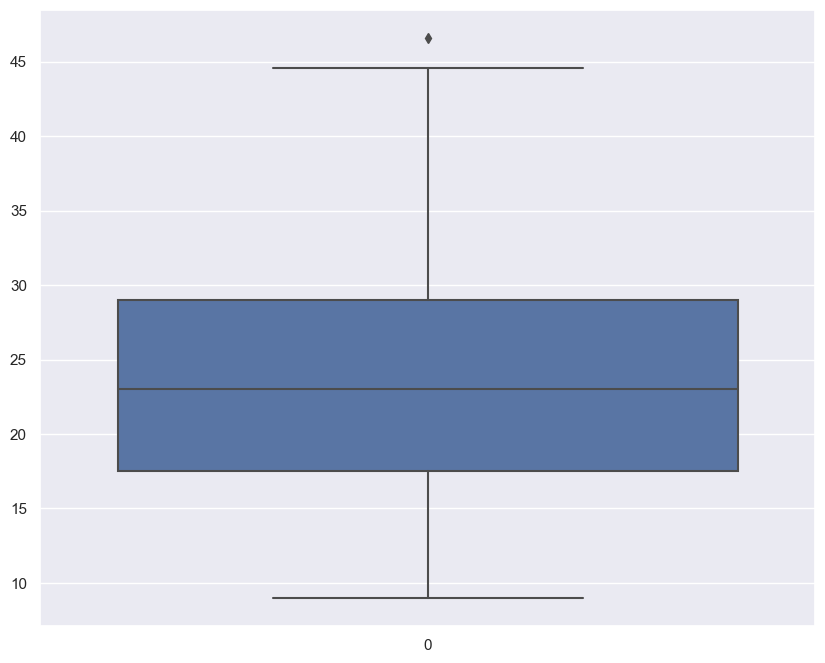

In [23]:
sns.boxplot(df['mpg'])

<Axes: >

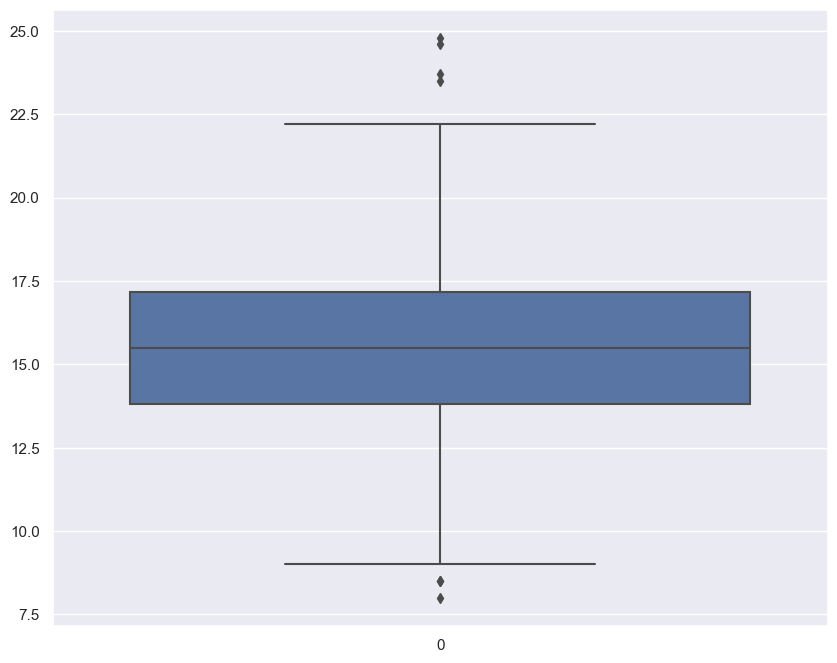

In [24]:
sns.boxplot(df['acceleration'])

<Axes: >

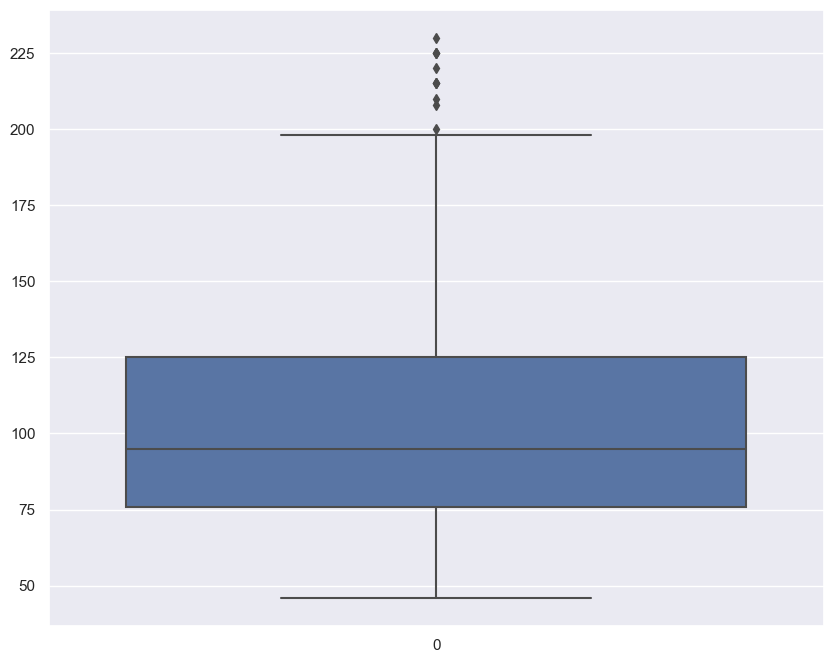

In [25]:
sns.boxplot(df['horsepower'])

<Axes: >

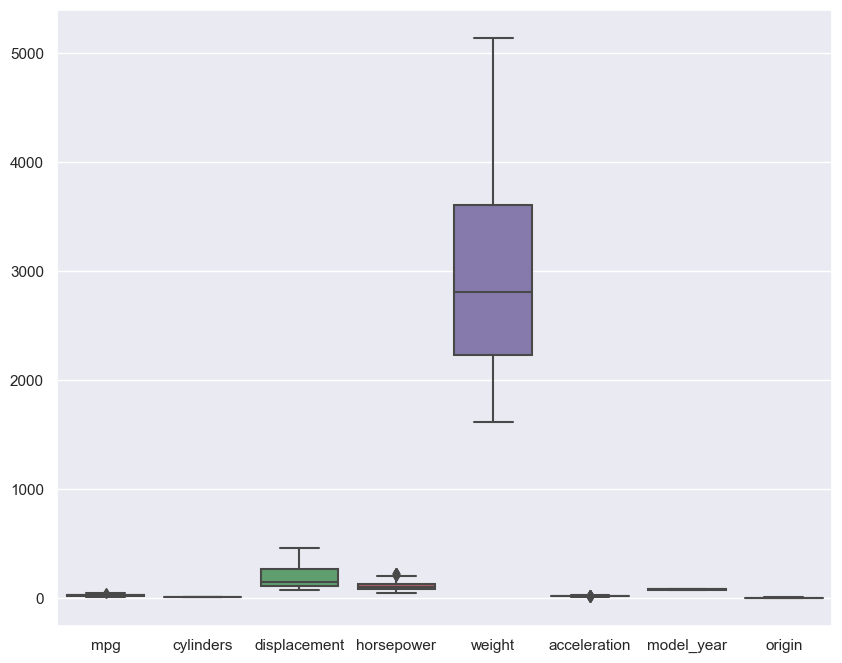

In [26]:
sns.boxplot(df)

# OUTLIER

In [28]:
HPQ1=df["horsepower"].quantile(0.25)
HPQ3=df["horsepower"].quantile(0.75)
HPIQR=HPQ3-HPQ1
print("First Quartile: ",HPQ1)
print("Third Quartile: ",HPQ3)
print("Interquartile: ",HPIQR)
print("*********************************************************")
HPlower_limit=HPQ1-1.5*HPIQR
HPupper_limit=HPQ3+1.5*HPIQR
print("Lower Limit: ",HPlower_limit)
print("Upper Limi: ",HPupper_limit)


First Quartile:  76.0
Third Quartile:  125.0
Interquartile:  49.0
*********************************************************
Lower Limit:  2.5
Upper Limi:  198.5


In [29]:
filter_lower=HPlower_limit<df["horsepower"]
filter_upper=df["horsepower"]<HPupper_limit
my_filter=filter_lower&filter_upper
df=df[my_filter]

In [30]:
MPGQ1=df["mpg"].quantile(0.25)
MPGQ3=df["mpg"].quantile(0.75)
MPGIQR=MPGQ3-MPGQ1
print("First Quartile: ",MPGQ1)
print("Third Quartile: ",MPGQ3)
print("Interquartile: ",MPGIQR)
print("*********************************************************")
MPGlower_limit=MPGQ1-1.5*MPGIQR
MPGupper_limit=MPGQ3+1.5*MPGIQR
print("Lower Limit: ",MPGlower_limit)
print("Upper Limi: ",MPGupper_limit)

First Quartile:  18.0
Third Quartile:  29.25
Interquartile:  11.25
*********************************************************
Lower Limit:  1.125
Upper Limi:  46.125


In [31]:
filter_lower=MPGlower_limit<df["mpg"]
filter_upper=df["mpg"]<MPGupper_limit
my_filter=filter_lower&filter_upper
df=df[my_filter]

In [32]:
AQ1=df["acceleration"].quantile(0.25)
AQ3=df["acceleration"].quantile(0.75)
AIQR=AQ3-AQ1
print("First Quartile: ",AQ1)
print("Third Quartile: ",AQ3)
print("Interquartile: ",AIQR)
print("*********************************************************")
Alower_limit=AQ1-1.5*AIQR
Aupper_limit=AQ3+1.5*AIQR
print("Lower Limit: ",Alower_limit)
print("Upper Limi: ",Aupper_limit)

First Quartile:  14.0
Third Quartile:  17.275
Interquartile:  3.2749999999999986
*********************************************************
Lower Limit:  9.087500000000002
Upper Limi:  22.187499999999996


In [33]:
filter_lower=Alower_limit<df["acceleration"]
filter_upper=df["acceleration"]<Aupper_limit
my_filter=filter_lower&filter_upper
df=df[my_filter]

In [34]:
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950,17.3,82,1,chevrolet camaro
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [35]:
df = df.drop(['car_name'],axis=1)

In [36]:
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950,17.3,82,1
393,27.0,4,140.0,86.0,2790,15.6,82,1
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [37]:

df["cylinders"]=df["cylinders"].astype(str)
df["origin"]=df["origin"].astype(str)
df["model_year"]=df["model_year"].astype(str)

In [38]:
df_num = df.select_dtypes(include = [np.number])

In [39]:
df_num.columns

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'], dtype='object')

In [40]:
df_num

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504,12.0
1,15.0,350.0,165.0,3693,11.5
2,18.0,318.0,150.0,3436,11.0
3,16.0,304.0,150.0,3433,12.0
4,17.0,302.0,140.0,3449,10.5
...,...,...,...,...,...
392,27.0,151.0,90.0,2950,17.3
393,27.0,140.0,86.0,2790,15.6
395,32.0,135.0,84.0,2295,11.6
396,28.0,120.0,79.0,2625,18.6


In [41]:

df_cat = df.select_dtypes(include = [object])


In [42]:
df_cat.columns

Index(['cylinders', 'model_year', 'origin'], dtype='object')

In [43]:
categorical_columns =  list(df_cat.columns)

In [44]:
dummy_var = pd.get_dummies(data = df_cat, prefix = None, prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [45]:
dummy_var

,cylinders_4,cylinders_5,cylinders_6,cylinders_8,model_year_71,model_year_72,model_year_73,model_year_74,model_year_75,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82,origin_2,origin_3
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
393,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
395,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
396,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [46]:
df= pd.concat([df_num, dummy_var], axis = 1)


In [47]:
df.head()

,mpg,displacement,horsepower,weight,acceleration,cylinders_4,cylinders_5,cylinders_6,cylinders_8,model_year_71,...,model_year_75,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82,origin_2,origin_3
0,18.0,307.0,130.0,3504,12.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,350.0,165.0,3693,11.5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,318.0,150.0,3436,11.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,304.0,150.0,3433,12.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,302.0,140.0,3449,10.5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
x = df.drop(['mpg'],axis=1)

In [49]:
y = df['mpg']

In [50]:
x

,displacement,horsepower,weight,acceleration,cylinders_4,cylinders_5,cylinders_6,cylinders_8,model_year_71,model_year_72,...,model_year_75,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82,origin_2,origin_3
0,307.0,130.0,3504,12.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,350.0,165.0,3693,11.5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,318.0,150.0,3436,11.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,304.0,150.0,3433,12.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,302.0,140.0,3449,10.5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,151.0,90.0,2950,17.3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
393,140.0,86.0,2790,15.6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
395,135.0,84.0,2295,11.6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
396,120.0,79.0,2625,18.6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
392    27.0
393    27.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 378, dtype: float64

### train test split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [53]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [54]:
x_train

array([[-0.37219821, -0.33408509,  0.01253337, ...,  3.59092423,
        -0.42257713, -0.52474977],
       [-1.00485207, -0.90575771, -1.23115212, ..., -0.27847984,
         2.36643191, -0.52474977],
       [ 1.16862006,  1.14022852,  0.32193806, ..., -0.27847984,
        -0.42257713, -0.52474977],
       ...,
       [ 1.19923234,  0.86943623,  1.09241639, ..., -0.27847984,
        -0.42257713, -0.52474977],
       [-0.7701579 , -0.39426115, -0.40607297, ...,  3.59092423,
        -0.42257713, -0.52474977],
       [ 1.6584166 ,  1.32075672,  1.3860475 , ..., -0.27847984,
        -0.42257713, -0.52474977]])

In [55]:
x_test

array([[-0.98444389, -0.96593378, -0.98241503, ..., -0.27847984,
         2.36643191, -0.52474977],
       [-1.00485207, -1.17655001, -1.07948316, ..., -0.27847984,
        -0.42257713,  1.90567021],
       [-0.53546373, -0.51461328, -0.67301034, ..., -0.27847984,
        -0.42257713, -0.52474977],
       ...,
       [-0.98444389, -1.23672607, -1.38282109, ..., -0.27847984,
        -0.42257713,  1.90567021],
       [-0.67832105, -0.09338082,  0.00646661, ..., -0.27847984,
         2.36643191, -0.52474977],
       [-0.92321932, -1.02610984, -1.06128289, ..., -0.27847984,
        -0.42257713,  1.90567021]])

In [56]:
x_train.shape

(264, 22)

In [57]:
x_test.shape



(114, 22)

In [58]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [59]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2.5852
- Mean Absolute Error: 1.9856
- R2 Score: 0.8737
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.0125
- Mean Absolute Error: 2.2370
- R2 Score: 0.8596


Lasso
Model performance for Training set
- Root Mean Squared Error: 3.6795
- Mean Absolute Error: 2.8269
- R2 Score: 0.7442
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.1487
- Mean Absolute Error: 3.1015
- R2 Score: 0.7337


Ridge
Model performance for Training set
- Root Mean Squared Error: 2.5884
- Mean Absolute Error: 1.9854
- R2 Score: 0.8734
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.0214
- Mean Absolute Error: 2.2229
- R2 Score: 0.8588


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2.8461
- Mean Absolute Error: 2.1588
- R2 Score: 0.8469
-----------------------

In [60]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.859604
2,Ridge,0.858774
7,CatBoosting Regressor,0.858072
5,Random Forest Regressor,0.812601
8,AdaBoost Regressor,0.798525
6,XGBRegressor,0.795311
3,K-Neighbors Regressor,0.793925
1,Lasso,0.733734
4,Decision Tree,0.611663


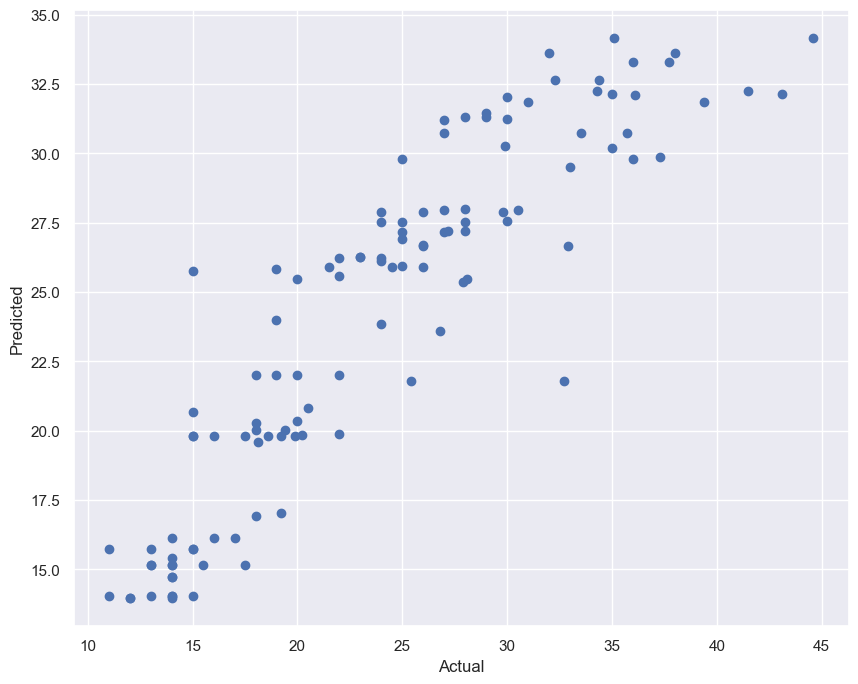

In [61]:
plt.scatter(y_test,y_test_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='mpg'>

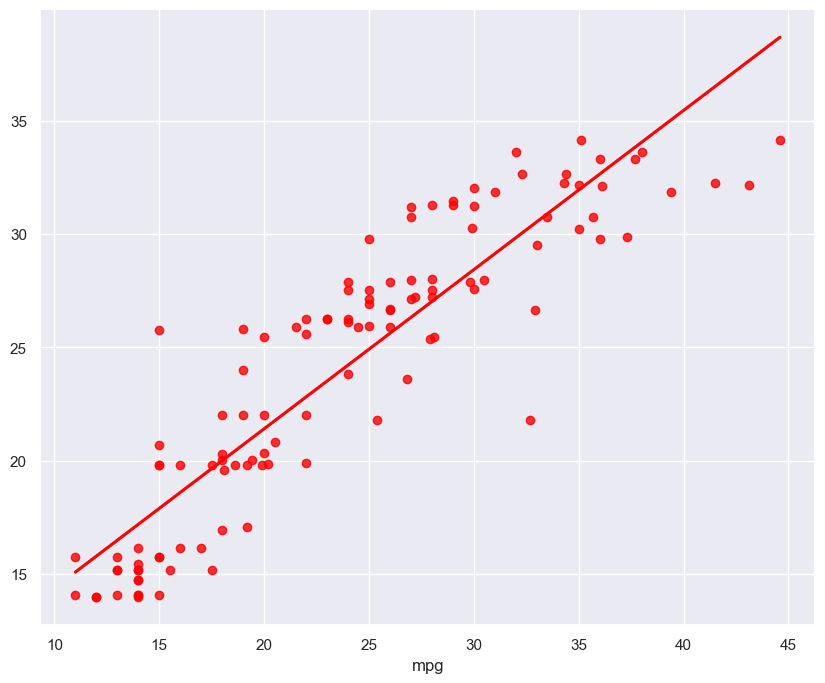

In [62]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red')

In [65]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_test_pred,'Difference':y_test-y_test_pred})
pred_df

,Actual Value,Predicted Value,Difference
304,37.3,29.877215,7.422785
348,37.7,33.305960,4.394040
342,30.0,27.558209,2.441791
159,14.0,14.057143,-0.057143
65,14.0,15.144118,-1.144118
...,...,...,...
146,28.0,27.996721,0.003279
239,30.0,32.019355,-2.019355
248,36.1,32.111220,3.988780
179,22.0,25.582911,-3.582911


### perform grid search cv

In [66]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid for each model
param_grid = {
    'Linear Regression': {},
    'Lasso': {'alpha': [0.1, 0.5, 1.0]},
    'Ridge': {'alpha': [0.1, 0.5, 1.0]},
    'K-Neighbors Regressor': {'n_neighbors': [3, 5, 7]},
    'Decision Tree': {'max_depth': [None, 10, 20]},
    'Random Forest Regressor': {'n_estimators': [50, 100, 200]},
    'XGBRegressor': {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 200]},
    'CatBoosting Regressor': {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 200]},
    'AdaBoost Regressor': {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 200]}
}

# Perform GridSearchCV for each model
best_models = {}
r2_list1 = []
for model_name, model in models.items():
    print("Tuning hyperparameters for", model_name)
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='r2')
    grid_search.fit(x_train, y_train)
    best_models[model_name] = grid_search.best_estimator_

# Evaluate the best models
for model_name, best_model in best_models.items():
    print(model_name)
    y_train_pred = best_model.predict(x_train)
    y_test_pred = best_model.predict(x_test)
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    r2_list1.append(model_test_r2)

    print('='*35)
    print('\n')




Tuning hyperparameters for Linear Regression
Tuning hyperparameters for Lasso
Tuning hyperparameters for Ridge
Tuning hyperparameters for K-Neighbors Regressor
Tuning hyperparameters for Decision Tree
Tuning hyperparameters for Random Forest Regressor
Tuning hyperparameters for XGBRegressor
Tuning hyperparameters for CatBoosting Regressor
Tuning hyperparameters for AdaBoost Regressor
Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2.5852
- Mean Absolute Error: 1.9856
- R2 Score: 0.8737
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.0125
- Mean Absolute Error: 2.2370
- R2 Score: 0.8596


Lasso
Model performance for Training set
- Root Mean Squared Error: 2.7453
- Mean Absolute Error: 2.0931
- R2 Score: 0.8576
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.1716
- Mean Absolute Error: 2.2451
- R2 Score: 0.8444


Ridge
Model performance for Training set
- Root Mea

In [67]:
results  = pd.DataFrame(list(zip(best_models, r2_list1)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

In [68]:
results

,Model Name,R2_Score
0,Linear Regression,0.859604
2,Ridge,0.858774
7,CatBoosting Regressor,0.853969
1,Lasso,0.844386
5,Random Forest Regressor,0.815547
3,K-Neighbors Regressor,0.792421
6,XGBRegressor,0.789865
8,AdaBoost Regressor,0.789459
4,Decision Tree,0.618494
